# Sonderübung 3

In [1]:
import numpy as np

## Aufgabe 3

In [2]:
def interval_hull(A):
    '''
    Helper Function to create a new array with max and min of input array as bounds
    '''
    return np.array([A.min(),A.max()])


# Eine etwas ausführlichere Implementation eins Intervalls (Box)
class Box(np.ndarray):
    '''
    This class represents a 1 Dimensional Box
    Multiplication, Additon, Subtraction and Exponentiation are implemented
    '''
    
    def __new__(cls, input_array):
        return np.asarray(input_array).view(cls)
    
    def __array_finalize__(self, obj):
        if not obj.shape == (2,):
            raise Exception(f"Expected interval of shape (2,), recieved {obj.shape}")

    # instead of interval_multipl
    def __mul__(self, y):
        '''
        Multiply two Intervals
        '''
        x = self.transpose()
        y = y.transpose()
        arr = np.array([x[0]*y[0], x[0]*y[1], x[1]*y[0], x[1]*y[1]])
        return Box(interval_hull(arr))
    
    # instead of interval_add:
    def __add__(self, y):
        '''
        Add two intervals using numpy addition
        '''
        return Box(np.array(self) + np.array(y))
    
    # instead of interval_subtract:
    def __sub__(self, y):
        '''
        Subtract two Intervals by negating the second, then adding them
        '''
        y = 0-np.flip(y)
        return self + y
    
    def __repr__(self):
        '''
        For printing
        '''
        return(str(self))
    
    # For 4a)
    def __pow__(self, other):
        '''
        Raising an inteval to a power, only works for integers
        '''
        if other%2==0:
            if self[0]>=0:
                return Box(np.array(self)**other)
            elif self[1]<=0:
                return Box(np.array(np.flip(self))**other)
            else:
                max = np.max([self[0]**2,self[1]**other])
                return Box([0, max])
        else:
            return Box(np.array(self)**other)
    
    def box_width(self):
        '''
        Returns length of the interval
        '''
        return self[1]-self[0]
    
    def box_mean(self):
        '''
        Retruns center of Interval
        '''
        return (self[1]+self[0])/2


In [11]:
# Hier noch eine Implementation streng gemäß der Aufgabenstellung

def interval_add(X,Y):
    return X+Y

def interval_subtract(X,Y):
    return np.array(Box(X)-Box(Y))

def interval_multiply(X,Y):
    return np.array(Box(X)*Box(Y))

def SQR(X):
    return np.array(Box(X)**2)

## Aufgabe 4

## a)

In [4]:
def F1(X):
    return X*X

def F2(X):
    return X**2

## b)

In [5]:
F1_Width = list()
F1_Center = list()

F2_Width = list()
F2_Center = list()

B_Width = list()

for e in np.arange(start=0.1, stop=35.1, step=0.1):
    b = Box([-10,-10+e])
    
    b_F1 = F1(b)
    b_F2 = F2(b)
    
    F1_Width.append(b_F1.box_width()) 
    F2_Width.append(b_F2.box_width()) 
    
    F1_Center.append(b_F1.box_mean())
    F2_Center.append(b_F2.box_mean())
    

## c):

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})

### Plot der Boxmittelpunkte/Boxweite

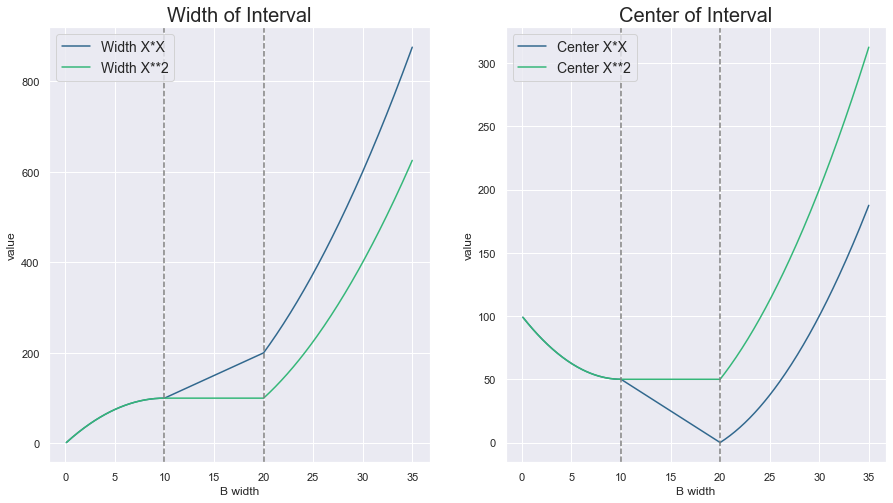

In [7]:
width_df = pd.DataFrame({"B width":np.arange(start=0.1, stop=35.1, step=0.1), "Width X*X": F1_Width, "Width X**2": F2_Width})
center_df = pd.DataFrame({"B width":np.arange(start=0.1, stop=35.1, step=0.1), "Center X*X": F1_Center, "Center X**2": F2_Center})

fig, ax =plt.subplots(1,2)

graph1 = sns.lineplot(data=pd.melt(width_df, ['B width']), x="B width", y="value", hue="variable", palette="viridis", ax=ax[0])
graph1.legend(loc=2, prop={'size': 14})
graph1.set_title("Width of Interval", size=20)
graph1.axvline(10, color = "grey", label="mean", linestyle="--")
graph1.axvline(20, color = "grey", label="mean", linestyle="--")

graph2 = sns.lineplot(data=pd.melt(center_df, ['B width']), x="B width", y="value", hue="variable", palette="viridis", ax=ax[1])
graph2.legend(loc=2, prop={'size': 14})
graph2.set_title("Center of Interval", size=20)
graph2.axvline(10, color = "grey", label="mean", linestyle="--")
graph2.axvline(20, color = "grey", label="mean", linestyle="--")